In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv('C:/Users/PJH/OneDrive/Python/Example/kumsan wheather analysis/kumsan_weather.csv')

In [3]:
df.head()

,지점,지점명,일시,기온(°C),강수량(mm),습도(%),현지기압(hPa),적설(cm)
0,238,금산,2020-01-01 1:00,-9.2,NaN,81,1013.1,NaN
1,238,금산,2020-01-01 2:00,-9.5,NaN,82,1012.7,NaN
2,238,금산,2020-01-01 3:00,-8.6,NaN,74,1012.3,NaN
3,238,금산,2020-01-01 4:00,-7.9,NaN,78,1011.8,NaN
4,238,금산,2020-01-01 5:00,-7.5,NaN,77,1011.8,NaN


In [4]:
df.shape

(5976, 8)

In [5]:
#지점, 지점명 칼럼 삭제
df = df.drop(columns = ['지점','지점명']) # df = df.drop(['지점','지점명'], axis = 1)와 같은 표현

In [6]:
df.head(5)

,일시,기온(°C),강수량(mm),습도(%),현지기압(hPa),적설(cm)
0,2020-01-01 1:00,-9.2,NaN,81,1013.1,NaN
1,2020-01-01 2:00,-9.5,NaN,82,1012.7,NaN
2,2020-01-01 3:00,-8.6,NaN,74,1012.3,NaN
3,2020-01-01 4:00,-7.9,NaN,78,1011.8,NaN
4,2020-01-01 5:00,-7.5,NaN,77,1011.8,NaN


In [7]:
#칼럼명 재생성
df.columns = ['Date', 'Temp(°C)', 'Prec(mm)', 'Hum(%)','Atm(hPa)', 'Snowfall(cm)']
df.tail()

,Date,Temp(°C),Prec(mm),Hum(%),Atm(hPa),Snowfall(cm)
5971,2020-09-05 20:00,21.1,NaN,78,993.6,NaN
5972,2020-09-05 21:00,20.6,NaN,81,993.6,NaN
5973,2020-09-05 22:00,19.7,NaN,87,993.2,NaN
5974,2020-09-05 23:00,19.7,NaN,86,993.4,NaN
5975,2020-09-06 0:00,19.8,NaN,83,993.3,NaN


In [8]:
#결측치 확인
df.isna().sum()

Date               0
Temp(°C)          10
Prec(mm)        5207
Hum(%)             0
Atm(hPa)           8
Snowfall(cm)    5938
dtype: int64

In [9]:
#결측치 0으로 대체
df = df.fillna(0)

#날짜 datatype 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5976 entries, 0 to 5975
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          5976 non-null   object 
 1   Temp(°C)      5976 non-null   float64
 2   Prec(mm)      5976 non-null   float64
 3   Hum(%)        5976 non-null   int64  
 4   Atm(hPa)      5976 non-null   float64
 5   Snowfall(cm)  5976 non-null   float64
dtypes: float64(4), int64(1), object(1)
memory usage: 280.2+ KB


In [10]:
#resample() 메소드 사용을 위한 날짜 데이터 타입 변경
df['Date'] = df['Date'].apply(pd.to_datetime)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5976 entries, 0 to 5975
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          5976 non-null   datetime64[ns]
 1   Temp(°C)      5976 non-null   float64       
 2   Prec(mm)      5976 non-null   float64       
 3   Hum(%)        5976 non-null   int64         
 4   Atm(hPa)      5976 non-null   float64       
 5   Snowfall(cm)  5976 non-null   float64       
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 280.2 KB


,Date,Temp(°C),Prec(mm),Hum(%),Atm(hPa),Snowfall(cm)
0,2020-01-01 01:00:00,-9.2,0.0,81,1013.1,0.0
1,2020-01-01 02:00:00,-9.5,0.0,82,1012.7,0.0
2,2020-01-01 03:00:00,-8.6,0.0,74,1012.3,0.0
3,2020-01-01 04:00:00,-7.9,0.0,78,1011.8,0.0
4,2020-01-01 05:00:00,-7.5,0.0,77,1011.8,0.0


In [11]:
#날짜 데이터 인덱스 생성
df = df.set_index('Date', inplace=False)

In [12]:
#일간, 주간, 월간 평균치 샘플링
df_day_mean = df.resample('d').mean()
df_week_mean = df.resample('w').mean()
df_mon_mean = df.resample('m').mean()

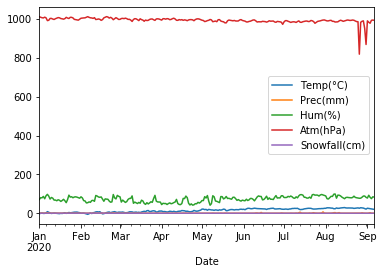

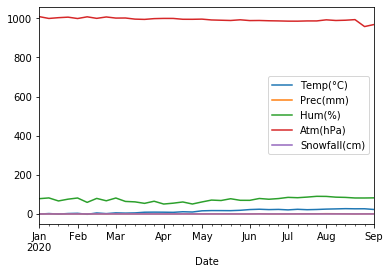

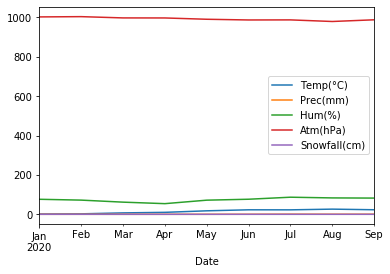

In [13]:
#샘플링 데이터 시각화 전체 칼럼 시각화
df_day_mean.plot()
df_week_mean.plot()
df_mon_mean.plot()
display()

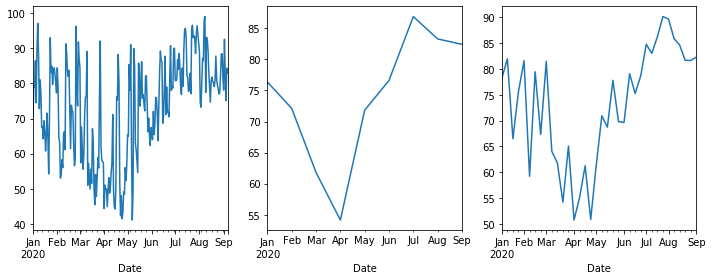

In [14]:
#샘플링 데이터 중 특정 칼럼 plotting
fig, ax = plt.subplots(1,3, figsize=(10,4))
df_day_mean.iloc[:,2].plot(ax=ax[0])
df_mon_mean.iloc[:,2].plot(ax=ax[1])
df_week_mean.iloc[:,2].plot(ax=ax[2])
plt.tight_layout()
display()

In [15]:
#샘플링 데이터 날짜 인덱스 reset
df_day_mean_ri = df_day_mean.reset_index()
df_week_mean_ri = df_week_mean.reset_index()
df_mon_mean_ri = df_mon_mean.reset_index()
df_day_mean_ri

,Date,Temp(°C),Prec(mm),Hum(%),Atm(hPa),Snowfall(cm)
0,2020-01-01,-2.765217,0.000000,70.521739,1011.360870,0.0
1,2020-01-02,-0.416667,0.000000,80.041667,1009.079167,0.0
2,2020-01-03,1.137500,0.000000,79.000000,1006.333333,0.0
3,2020-01-04,-1.025000,0.000000,86.458333,1005.345833,0.0
4,2020-01-05,-0.741667,0.000000,74.458333,1009.350000,0.0
...,...,...,...,...,...,...
245,2020-09-02,24.458333,0.850000,92.541667,983.100000,0.0
246,2020-09-03,22.804167,2.591667,82.000000,977.979167,0.0
247,2020-09-04,22.433333,0.000000,75.083333,993.233333,0.0
248,2020-09-05,20.541667,0.000000,84.375000,994.312500,0.0


In [16]:
#주별 feature 생성
t=df_week_mean_ri['Date']
Temp=df_week_mean_ri['Temp(°C)']
Atm=df_week_mean_ri['Atm(hPa)']
Prc=df_week_mean_ri['Prec(mm)']
Hum=df_week_mean_ri['Hum(%)']
Sf=df_week_mean_ri['Snowfall(cm)']

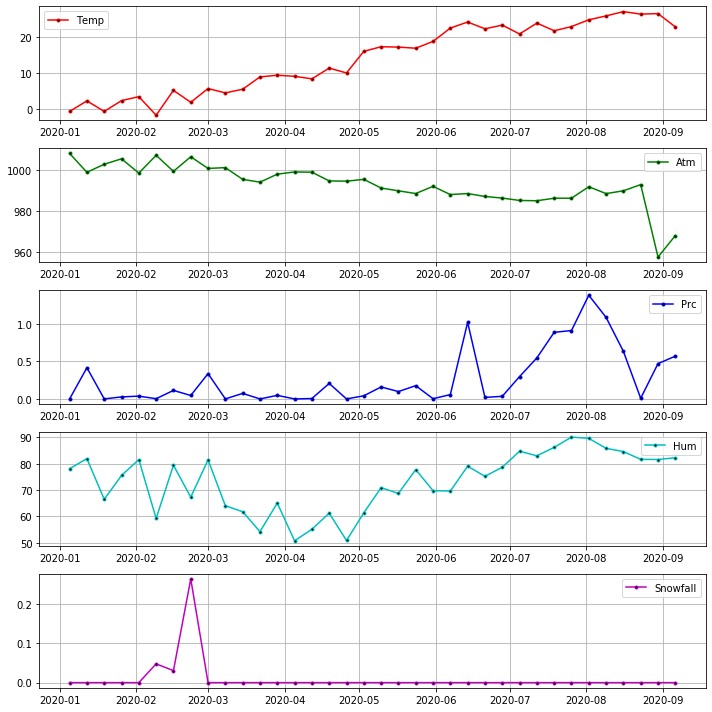

In [17]:
# 주별 데이터 plotting
fig, ax = plt.subplots(5, 1, figsize=(10,10))
ax[0].plot(t, Temp, c='r', marker='.', mfc='k', label='Temp')
ax[1].plot(t, Atm, c='g', marker='.', mfc='k', label='Atm')
ax[2].plot(t, Prc, c='b', marker='.', mfc='k', label='Prc')
ax[3].plot(t, Hum, c='c', marker='.', mfc='k', label='Hum')
ax[4].plot(t, Sf, c='m', marker='.', mfc='k', label='Snowfall')
plt.tight_layout()

for i in range(5):
    ax[i].grid()
    ax[i].legend()